<a href="https://colab.research.google.com/github/Er-luffy-D/Brain-Tumor/blob/main/Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Downloading the data

In [2]:
import kagglehub
import shutil
import os

# Download dataset and store the path to it
path = kagglehub.dataset_download("preetviradiya/brian-tumor-dataset")

# Define a new destination path for easier access
destination_path = "/content/brain_tumor_dataset"

# Move the dataset to the new location
if os.path.exists(destination_path):
    shutil.rmtree(destination_path)  # Remove if already exists
shutil.move(path, destination_path)

print("Path to dataset files:", destination_path)

# Verify by listing the files in the new directory
!ls /content/brian_tumor_dataset


100%|██████████| 107M/107M [00:02<00:00, 54.3MB/s] 

Extracting files...


Path to dataset files: /content/brian_tumor_dataset
'Brain Tumor Data Set'	 metadata.csv   metadata_rgb_only.csv


In [15]:
from pathlib import Path
image_folder=Path(destination_path)
image_pathlist=list(image_folder.glob("*/*/*/*.jpg"))
image_pathlist[:2]

[PosixPath('/content/brian_tumor_dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1558).jpg'),
 PosixPath('/content/brian_tumor_dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1989).jpg')]

## 2. Visualizing IMG

Healthy
Image path:/content/brian_tumor_dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1412).jpg
Image height: 282 pixels
Image width: 230 pixels


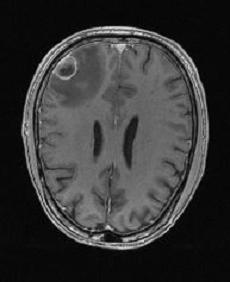

In [26]:
from PIL import Image
import random

random_image=random.choice(image_pathlist)
label=random_image.parent.name
print(label)
image=Image.open(random_image)
print(f"Image path:{random_image}")
print(f"Image height: {image.height} pixels")
print(f"Image width: {image.width} pixels")
image


In [30]:
import numpy as np
import matplotlib.pyplot as plt

img=np.asarray(image)
img.shape

(282, 230, 3)

In [31]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

### Transforming data using torchvisons.transforms

In [32]:
data_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(p=0.5)
])